In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/GitHub/automating-gis-processes/Lesson-2

/content/drive/MyDrive/GitHub/automating-gis-processes/Lesson-2


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 6.3 MB 38.4 MB/s 
     |████████████████████████████████| 16.7 MB 44.8 MB/s 


In [5]:
# Import necessary packages
import geopandas as gpd

# Read the file
fp = "L2_data/Europe_borders.shp"
data = gpd.read_file(fp)

In [6]:
# Check the coordinate reference system
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Checl values in geometry column to verify that the CRS of the GeoDataFrame seems correct:

In [7]:
data["geometry"]

0       POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1       POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2       POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3       POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4       POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
                              ...                        
3627    POLYGON ((18.75422 59.49353, 18.74311 59.49050...
3628    POLYGON ((18.84164 59.50605, 18.84028 59.50797...
3629    POLYGON ((18.59995 59.45653, 18.59431 59.45964...
3630    POLYGON ((30.00000 51.48947, 29.99511 51.48572...
3631    POLYGON ((-5.34392 36.11253, -5.34717 36.11528...
Name: geometry, Length: 3632, dtype: geometry

Re-project the data into EPSG 3035 using epsg parameter

In [8]:
# Make a backup copy of the data
data_wgs84 = data.copy()

# Re-project the data
data = data.to_crs(epsg=3035)

In [9]:
# Check the new geometry values
data.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

In [10]:
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((4221214.558 3496203.404, 4220681.651..."
1,Europe/Berlin,"POLYGON ((4224860.478 2732279.320, 4224932.819..."
2,Europe/Berlin,"POLYGON ((4104652.176 3390034.953, 4104460.401..."
3,Europe/Berlin,"POLYGON ((4113025.664 3391895.756, 4112879.943..."
4,Europe/Berlin,"POLYGON ((4115871.228 3395282.099, 4114921.348..."


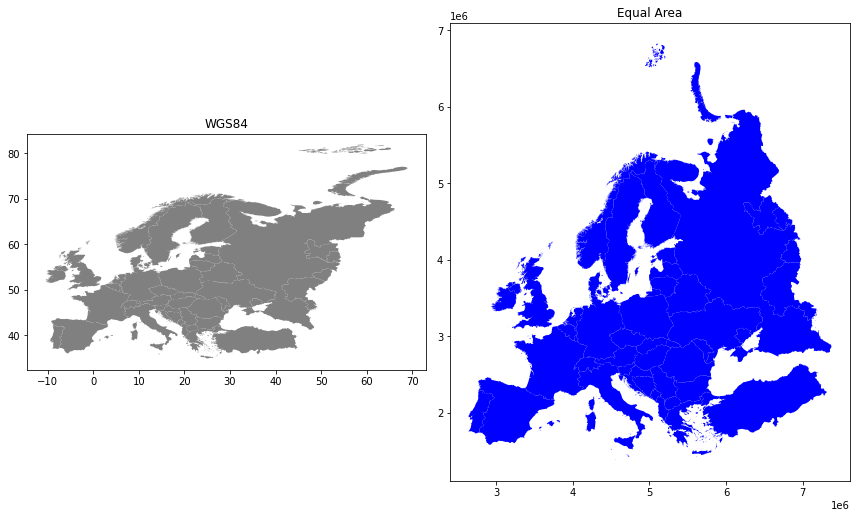

In [13]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# plot the data in WGS83 CRS
data_wgs84.plot(ax=ax1, facecolor="gray")

# Add title
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor="blue")

# Add title
ax2.set_title("Equal Area")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout()

In [14]:
# Output filepath
outfp = "L2_data/Europe_borders_epsg3035.shp"

# Save to disk
data.to_file(outfp)

### Dealing with different CRS formats

In [15]:
### Import CRS class from pyproj
from pyproj import CRS

In [16]:
# PROJ dictionary:
crs_dict = data_wgs84.crs

# pyproj CRS object:
crs_object = CRS(data_wgs84.crs)

# EPSG code (here, the input crs information is a bit vague so we need to lower the confidence threshold)
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)

# PROJ string
crs_proj4 = CRS(data_wgs84.crs).to_proj4()

# Well-Known Text (WKT)
crs_wkt = CRS(data_wgs84.crs).to_wkt()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


In [17]:
print("PROJ dictionary:\n", crs_dict)
print("\nCRS object:\n", crs_object)
print("\nEPSG code: \n", crs_epsg)
print("\nPROJ string: \n", crs_proj4)
print("\nWell-Known Text (WKT):\n",crs_wkt) 

PROJ dictionary:
 epsg:4326

CRS object:
 GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]

EPSG code: 
 4326

PROJ string: 
 +proj=longlat +datum=WGS84 +no_defs +type=crs

Well-Known Text (WKT):
 GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["Wor

### Pyproj CRS object

In [18]:
# Check the current CRS of our data
type(data.crs)

pyproj.crs.crs.CRS

In [19]:
# Initialize the CRS class for epsg code 3035:
CRS.from_epsg(3035)

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

We can also easily parse this information individually as follows:

In [21]:
# Name
print("Name:", data.crs.name)

# Coordinate system
print("Coordinate system:", data.crs.coordinate_system)

# Bounds of the area where CRS is used
print("Bounds:", data.crs.area_of_use.bounds)

Name: ETRS89-extended / LAEA Europe
Coordinate system: cartesian
Bounds: (-35.58, 24.6, 44.83, 84.73)


In [22]:
# Retrive CRS information in WKT format
data.crs.to_wkt()

'PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANG

### Global map projections

In [23]:
# Read in data
fp = "L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp" 
admin = gpd.read_file(fp)

In [24]:
# Check input crs
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
# Set fig size
plt.rcParams['figure.figsize'] = [12, 6]

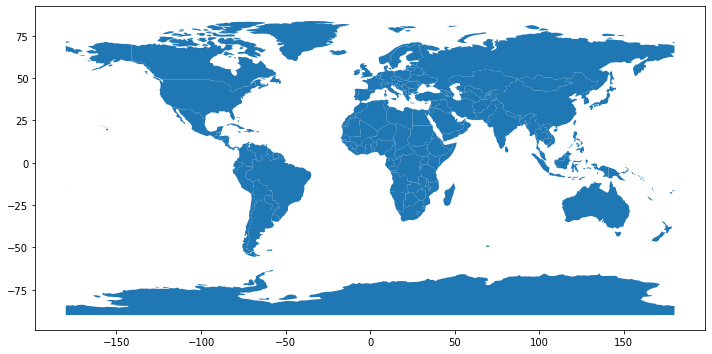

In [31]:
# Plot map in original crs:
admin.plot()

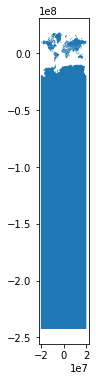

In [32]:
# Define projection as web mercator, 3785
web_mercator = CRS.from_epsg(3785)

# Re-project and plot
admin.to_crs(web_mercator).plot()

# Remove x and y axis
# plt.axis('off')
# plt.title("Web mercator")